# Modification Study

## 0. Setup

In [2]:
import os, sys
from tqdm.notebook import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")

In [3]:
DIR_PATH = 'F:/20210730_samples'
SAVE_PATH = os.path.join(DIR_PATH, 'numpy')
CT_PATH = os.path.join(SAVE_PATH, 'CT_target')
PT_PATH = os.path.join(SAVE_PATH, 'PT_resize')

## 1. Voxel Analysis

In [8]:
# Voxel Loading...

CT_list = os.listdir(CT_PATH)
PT_list = os.listdir(PT_PATH)

sample_num = len(os.listdir(CT_PATH)) # extract sample #
vol_shape = np.load(os.path.join(CT_PATH, CT_list[0])).shape # extract data shape
CT_voxel = np.zeros([sample_num, *vol_shape])
PT_voxel = np.zeros([sample_num, *vol_shape])

for i in range(sample_num):
    CT_voxel[i] = np.load(os.path.join(CT_PATH, CT_list[i]))
    PT_voxel[i] = np.load(os.path.join(PT_PATH, PT_list[i]))

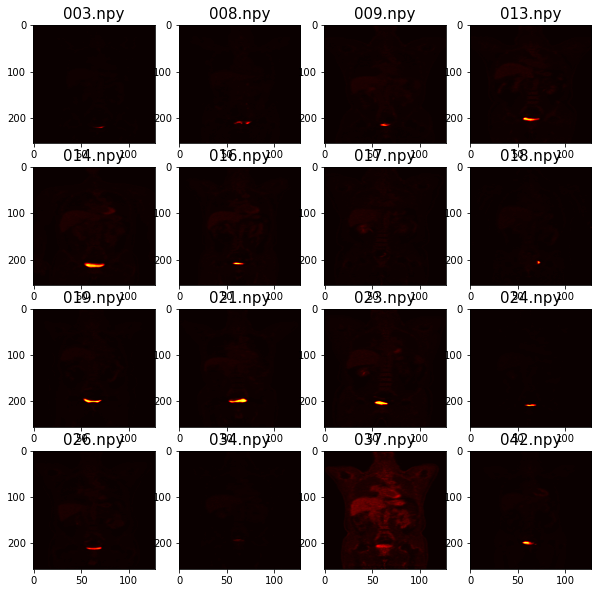

In [9]:
# Check PET images
from common.plot import mid_plot
fig = plt.figure(figsize=(10,10))
mid_plot(PATH=PT_PATH, fig=fig, grid=(4,4), vmax=1, cmap=plt.cm.hot)

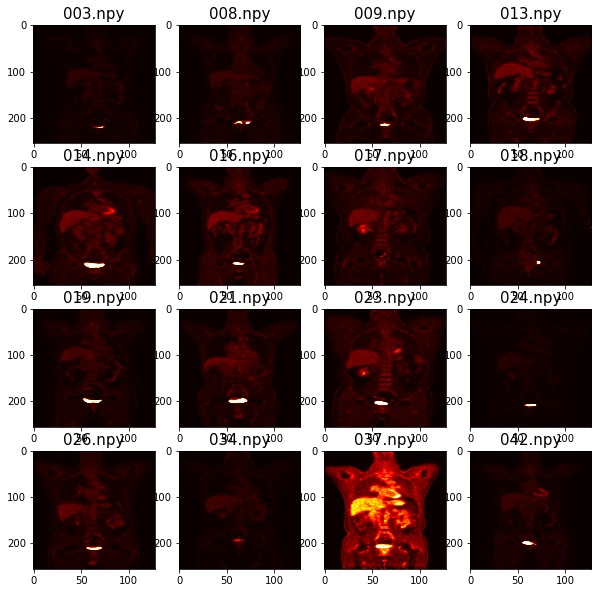

In [10]:
# With Max Limit
fig = plt.figure(figsize=(10,10))
mid_plot(PATH=PT_PATH, fig=fig, grid=(4,4), vmax=0.2, cmap=plt.cm.hot)

In [11]:
# Range Check

for i in range(16):
    print ('CT: [{:.1f}, {:.1f}], PT: [{:.1f}, {:.1f}]'.format(np.min(4095*CT_voxel[i]), 
                                                               np.max(4095*CT_voxel[i]), 
                                                               np.min(32767*PT_voxel[i]), 
                                                               np.max(32767*PT_voxel[i])))

CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 30182.2]
CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 31704.8]
CT: [0.0, 4095.0], PT: [0.0, 32093.9]
CT: [0.0, 4095.0], PT: [0.0, 31119.8]
CT: [0.0, 4095.0], PT: [0.0, 27181.4]
CT: [0.0, 4095.0], PT: [0.0, 31356.8]
CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 32275.0]
CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 32767.0]
CT: [0.0, 4095.0], PT: [0.0, 32207.9]
CT: [0.0, 4095.0], PT: [0.0, 32742.3]


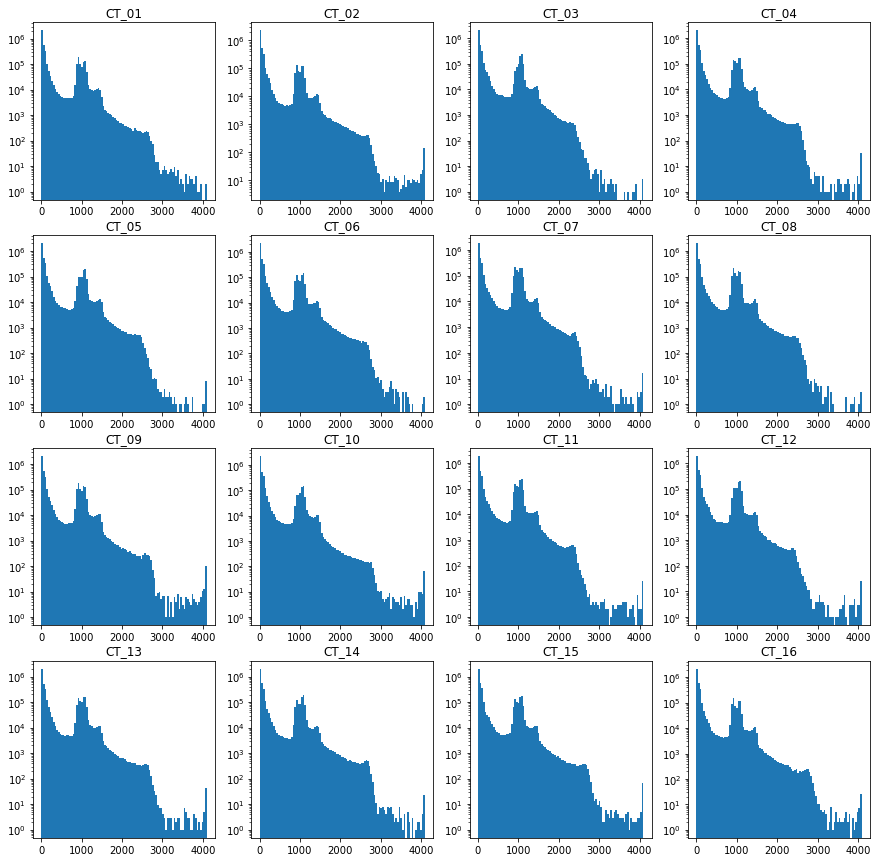

In [12]:
# CT Voxel Distribution

fig = plt.figure(figsize=(15,15))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('CT_{:02d}'.format(i+1))
    axes[-1].hist((4095*CT_voxel[i]).reshape(-1), bins=100, log=True)

plt.show()

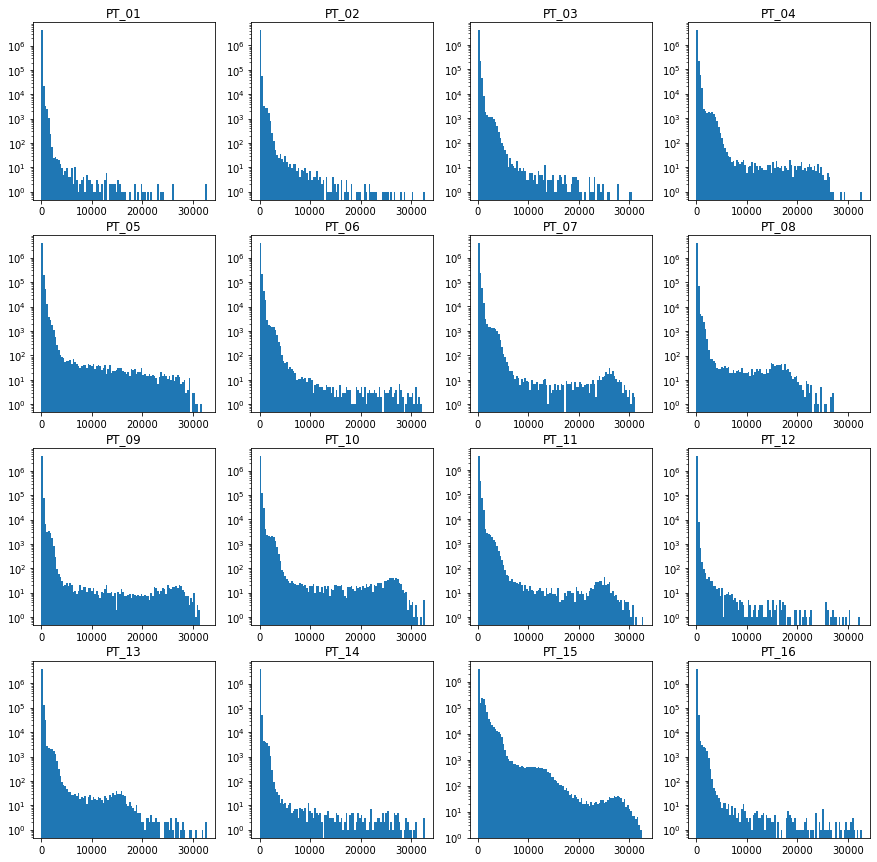

In [13]:
# PT Voxel Distribution

fig = plt.figure(figsize=(15,15))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('PT_{:02d}'.format(i+1))
    axes[-1].hist((32767*PT_voxel[i]).reshape(-1), bins=100, log=True, range=(0, 32767))

plt.show()

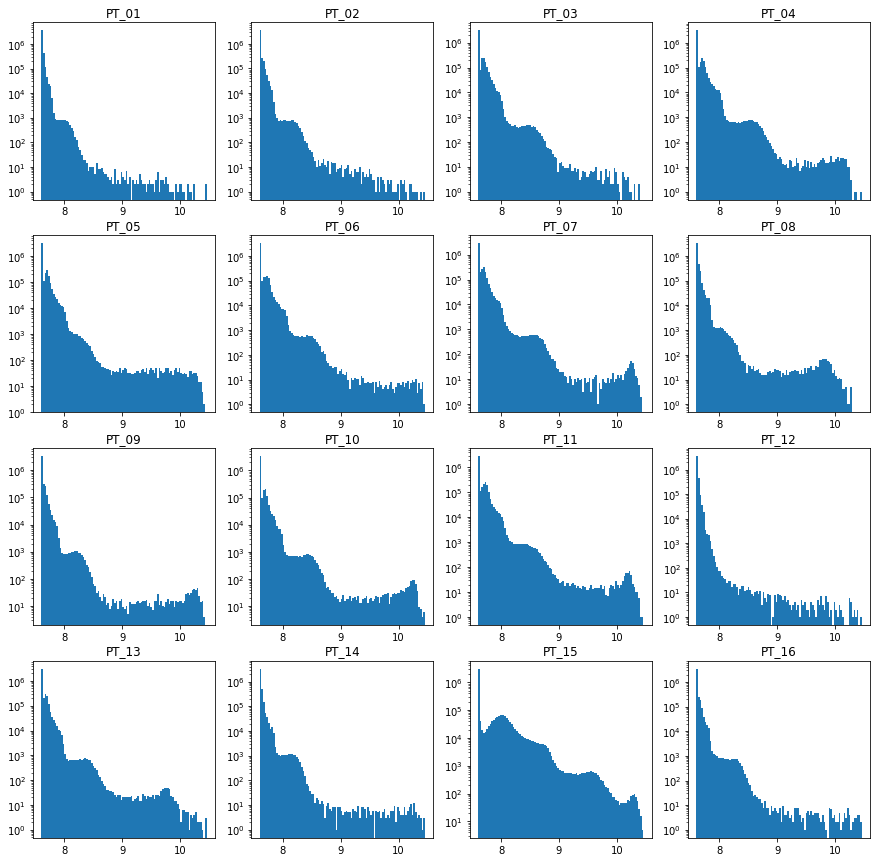

In [14]:
# PT Voxel Distribution with log scale

fig = plt.figure(figsize=(15,15))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('PT_{:02d}'.format(i+1))
    axes[-1].hist(np.log(32767*PT_voxel[i]+2e3).reshape(-1), bins=100, log=True, range=(np.log(2e3), np.log(32767+2e3)))

plt.show()

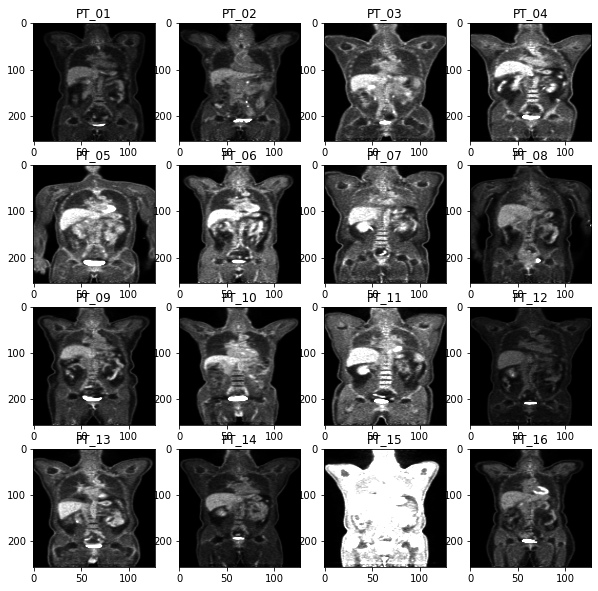

In [20]:
# PT Voxel Distribution

fig = plt.figure(figsize=(10,10))
axes = []

for i in range(16):
    axes.append(fig.add_subplot(4,4,i+1))
    axes[-1].set_title('PT_{:02d}'.format(i+1))
    plt.imshow(np.log(32767*PT_voxel[i, 64].T + 2e3), 
               cmap=plt.cm.gray, aspect='auto',
               vmax=8, vmin=np.log(2e3))
plt.show()

In [6]:
p = np.log(32767*PT_voxel[0, 64].T + 2e3)
np.max(p)
np.min(p)

7.5768379711407405

In [7]:
np.log(2e3)

7.600902459542082